2D PSV wave propagation in a homogenous block-model
====

The propagation of waves in a general elastic medium can be described by a system of coupled linear partial differential equations. They consist of the equations of motion

$$\rm{\rho \frac{\partial v_i}{\partial t} = \frac{\partial \sigma_{ij}}{\partial x_j} + fs_i}$$
   
which simply state that the momentum of the particles in the medium, the product of density $\rm{\rho}$ and the displacement velocity $\rm{v_i}$, can be changed by surface forces, described by the stress tensor $\rm{\sigma_{ij}}$ or body forces $\rm{fs_i}$. These equations describe a general medium, like gas, fluid, solid or plasma. The material specific properties are introduced by additional equations which describe how the medium reacts when a certain force is applied. In the isotropic elastic case this can be described by a linear stress-strain relationship:  

$$\begin{split}
\rm{\sigma_{ij}}&\rm{=\lambda \theta \delta_{ij} + 2 \mu \epsilon_{ij}}\\
\rm{\epsilon_{ij}}&\rm{=\frac{1}{2}\biggl(\frac{\partial u_i}{\partial x_j}+\frac{\partial u_j}{\partial x_i}\biggr)}
\end{split}
$$

where $\rm{\lambda}$ and $\rm{\mu}$ are the Lamé parameters, $\rm{\epsilon_{ij}}$ the strain tensor, $\rm{\theta = \epsilon_{11} + \epsilon_{22} + \epsilon_{33}}$ the cubic dilatation, $\rm{\delta_{ij}}$ the Kronecker Delta and $\rm{u_i}$ the displacement. By taking the time derivative of the stress-strain relationship and the strain tensor, we can derive the following partial differential equations to describe wave propagtion in a general 3D isotropic elastic medium:

$$\begin{split}
\rm{\rho \frac{\partial v_i}{\partial t}} &\rm{= \frac{\partial \sigma_{ij}}{\partial x_j} + fs_i}\\
\rm{\frac{\partial \sigma_{ij}}{\partial t}} &\rm{= \lambda \frac{\partial \theta}{\partial t} \delta_{ij} + 2 \mu \frac{\partial \epsilon_{ij}}{\partial t}}\\
\rm{\frac{\partial \epsilon_{ij}}{\partial t}}&\rm{=\frac{1}{2}\biggl(\frac{\partial v_i}{\partial x_j}+\frac{\partial v_j}{\partial x_i}\biggr)}
\end{split}
$$

Equations of motion for 2D PSV wave propagation in an isotropic elastic medium
----

In case of certain symmetries and model limitations, the general 3D seismic wave propagation in isotropic elastic media can be significantly simplified. Assuming only non-zero particle displacements in the x-y-plane (PSV problem), where x denotes the horizontal distance and y the depth, wave propagation can be described by the following system of partial differential equations:

$$\rm{\rho \frac{\partial v_x}{\partial t} = \frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y} + fs_x,} $$


$$\rm{\rho \frac{\partial v_y}{\partial t} = \frac{\partial \sigma_{xy}}{\partial x} + \frac{\partial \sigma_{yy}}{\partial y} + fs_y,} $$

$$\rm{\frac{\partial \sigma_{xx}}{\partial t} = (\lambda + 2 \mu) \frac{\partial v_{x}}{\partial x} + \lambda \frac{\partial v_{y}}{\partial y},} $$

$$\rm{\frac{\partial \sigma_{yy}}{\partial t} = \lambda \frac{\partial v_{x}}{\partial x} + (\lambda + 2 \mu) \frac{\partial v_{y}}{\partial y},} $$

$$\rm{\frac{\partial \sigma_{xy}}{\partial t} = \mu \biggl(\frac{\partial v_{x}}{\partial y} + \frac{\partial v_{y}}{\partial x}\biggr),}  $$

where $\rm{\rho}$ is the density, $\rm{\lambda}$ and $\rm{\mu}$ the Lamé parameters, $\rm{(v_x,\; v_y)}$ particle velocity vector, $\rm{\sigma_{xx}}$, $\rm{\sigma_{yy}}$, $\rm{\sigma_{xy}}$ stress tensor components, ($\rm{fs_x}$, $\rm{fs_y}$) directed body force vector, respectively.

Finite difference discretization on a staggered grid
----

For the numerical solution of the elastic equations of motion have to be discretized in time and space on a grid. The particle velocities $\rm{\mathbf{v}}$, the stresses $\rm{\sigma_{ij}}$, the Lamé parameters $\rm{\lambda}$ and $\rm{\mu}$ are calculated and defined at discrete Cartesian coordinates $\rm{x=i\; dh}$, $\rm{y=j\; dh}$ and discrete times $\rm{t=n\; dt}$. 
$\rm{dh}$ denotes the spatial distance between two adjacent grid points and $\rm{dt}$ the difference between two successive time steps. Therefore every grid point is located in the interval  $\rm{i \in N | [1,nx]}$, $\rm{j \in N | [1,ny]}$ and $\rm{n \in N | [1,nt]}$, where
$\rm{nx}$, $\rm{ny}$ and $\rm{nt}$ are the number of discrete spatial grid points and time steps, respectively.

Finally the partial derivatives are replaced by **finite-difference (FD)** operators. Two types of operators can be distinguished, forward and backward operators $\rm{D^+,\;D^-}$. The derivative of a function f(x) with respect to a variable x can be approximated by the following 2nd order operators:

$$\rm{D^+_x f = \frac{f_{i+1}-f_{i}}{dh} \hspace{1 cm} \text{forward operator}} $$

$$\rm{D^-_x f = \frac{f_i-f_{i-1}}{dh} \hspace{1 cm} \text{backward operator}} $$

To calculate the spatial derivatives of the wavefield variables at the correct positions with respect to each other, the variables are not placed on the same grid points, but staggered by half of the spatial grid point distance ([Virieux 1986](https://www.researchgate.net/publication/228078301_P-SV_wave_propagation_in_heterogeneous_media_Velocity-stress_finite-difference_method)). 
Figure 1 shows the distribution of the material parameters and wavefield variables on the spatial grid. 
To guarantee the stability of the **staggered grid** code, the Lamé parameter $\rm{\mu}$ and density $\rm{\rho}$ have to be averaged harmonically and arithmetically ([Moczo et al. 2004](http://www.quest-itn.org/library/training-material/the-finite-difference-method-for-seismologists.-an-introduction/at_download/file), [Bohlen 2006](https://www.researchgate.net/publication/249866080_Accuracy_of_heterogeneous_staggered-grid_finite-difference_modeling_of_Rayleigh_waves)), respectively

$$\rm{\mu_{xy}(j+1/2,i+1/2)=\biggl[\frac{1}{4}\biggl(\mu^{-1}_{j,i}+\mu^{-1}_{j,i+1}+\mu^{-1}_{j+1,i+1}+\mu^{-1}_{j+1,i}\biggr)\biggr]^{-1}} $$

$$\rm{\rho_x(j,i+1/2) = 0.5\, (\rho_{j,i+1}+\rho_{j,i})} $$

$$\rm{\rho_y(j+1/2,i) = 0.5\, (\rho_{j+1,i}+\rho_{j,i})} $$


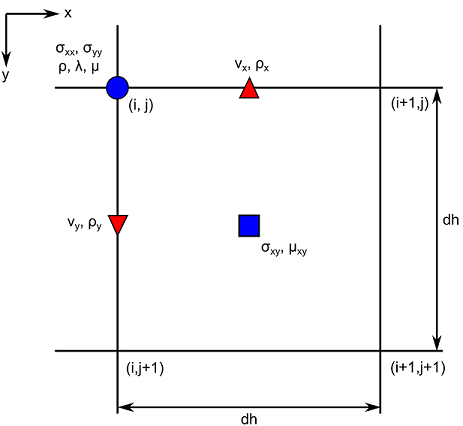

In [1]:
from IPython.core.display import Image
Image(filename = './fig/SSG_cart_new_small.png')

### Discretized equations of motion

In the next step we discretize the equations of motion for the 2D PSV problem using a staggered finite difference approach. First, we discretize the x-compoment of the momentum equation by approximating the spatial derivatives

$$\rm{\frac{\partial \sigma_{xx}}{\partial x} \approx \frac{\sigma_{xx}(j,i+1) - \sigma_{xx}(j,i)}{dh}}, \rm{\frac{\partial \sigma_{xy}}{\partial y} \approx \frac{\sigma_{xy}(j+1/2, i) - \sigma_{xy}(j-1/2,i)}{dh}} $$

and the LHS of the x-momentum equation

$$\rho \rm{\frac{\partial v_x}{\partial t} \approx \rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt}} $$

Inserting in the partial differential equation 

$$\rm{\rho \frac{\partial v_x}{\partial t} = \frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y}} $$

leads to 

$$\rho_x(j,i+1/2) \frac{v_x^{n+1/2}(j,i+1/2) - v_x^{n-1/2}(j,i+1/2)}{dt} = \frac{\sigma_{xx}^n(j,i+1) - \sigma_{xx}^n(j,i)}{dh} + \frac{\sigma_{xy}^n(j+1/2, i) - \sigma_{xy}^n(j-1/2,i)}{dh} $$

After rearranging for $v_x^{n+1/2}(j,i+1/2)$ we get the following explicit FD scheme for the x-component of the momentum equation:

$$\rm{v_x^{n+1/2}(j,i+1/2) = v_x^{n-1/2}(j,i+1/2) + \frac{dt}{dh\cdot \rho_x(j,i+1/2)}\cdot \biggl(\sigma^n_{xx}(j,i+1) - \sigma^n_{xx}
(j,i) + \sigma^n_{xy}(j+1/2, i) - \sigma^n_{xy}(j-1/2,i) \biggr)} $$

Using a similar approach we can derive the FD scheme for the y-compoment of the momentum equation ...

$$\rm{v_y^{n+1/2}(j,i+1/2) = v_y^{n-1/2}(j,i+1/2) + \frac{dt}{dh\cdot \rho_y(j+1/2,i)}\cdot \biggl(\sigma^n_{xy}(j, i+1/2) - \sigma^n_{xy}(j,i-1/2) + \sigma^n_{yy}(j+1,i) - \sigma^n_{yy}(j,i) \biggr)} $$

... and the stress-strain relationship ...

$$
\begin{split}   
\rm{\sigma^{n+1}_{xx}(j,i)}&\rm{= \sigma_{xx}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{yy}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{xx}(j,i)}\\ 
\rm{\sigma^{n+1}_{yy}(j,i)}&\rm{= \sigma_{yy}^{n}(j,i) + dt\cdot\lambda(j,i)\cdot \biggl(v^{n+1/2}_{xx}(j,i) + v^{n+1/2}_{yy}(j,i) \biggr) + 2 dt\cdot  \mu(j,i) \cdot  v^{n+1/2}_{yy}(j,i)}\\ 
\rm{\sigma^{n+1}_{xy}(j+1/2,i+1/2)}&\rm{=\sigma^{n}_{xy}(j+1/2,i+1/2) + dt\cdot\mu_{xy}(j+1/2,i+1/2)\biggl(v^{n+1/2}_{xy}(j+1/2,i+1/2) + v^{n+1/2}_{yx}(j+1/2,i+1/2)\biggr)}\\
\end{split}
$$

with the spatial derivatives

$$
\begin{split}  
\rm{v_{xx}(j,i)}&\rm{= \frac{v_x(j,i+1/2)-v_x(j,i-1/2)}{dh}}\\ 
\rm{v_{yy}(j,i)}&\rm{= \frac{v_y(j+1/2,i)-v_y(j-1/2,i)}{dh}}\\ 
\rm{v_{yx}(j+1/2,i+1/2)}&\rm{\approx \frac{v_y(j+1/2, i+1)-v_y(j+1/2, i)}{dh}}\\ 
\rm{v_{xy}(j+1/2,i+1/2)}&\rm{\approx \frac{v_x(j+1,i+1/2)-v_x(j, i+1/2)}{dh}}\\
\end{split}
$$

Implementing 2D PSV code
----


In [2]:
# load all necessary libraries 
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
%matplotlib inline

In [3]:
# spatial discretization
nx = 601
ny = 601
dh = 5.0
x = numpy.linspace(0, dh*(nx-1), nx)
y = numpy.linspace(0, dh*(ny-1), ny)
X, Y = numpy.meshgrid(x, y)

# time discretization
T = 0.3
dt = 0.6e-3
nt = numpy.round(T/dt)

# wavefield clip
clip = 2.5e-2

In [4]:
# define model parameters
rho = 7100.0
vp = 2955.0
vs = 2362.0
mu = rho * vs * vs
lam = rho * vp * vp - 2 * mu

Because we are currently dealing with a homogeneous block model, we don't have to care about the artihmetic and harmonic averaging of density and shear modulus, respectively.

**Assemble the 2D PSV code**

In [5]:
@jit(nopython=True)
def psv_mod(nt, nx, ny, dt, dh, rho, lam, mu):
    
    # initialize wavefields
    vx = numpy.zeros((ny, nx))
    vy = numpy.zeros((ny, nx))
    sxx = numpy.zeros((ny, nx)) 
    syy = numpy.zeros((ny, nx))
    sxy = numpy.zeros((ny, nx))
    
    # define some parameters
    dtdx = dt / dh
    rhoi = 1.0 / rho
    ny, nx = vx.shape
    
    # define source wavelet parameters
    fc = 17.0
    tshift = 0.0
    ts = 1.0 / fc
    
    # source position [gridpoints]
    jjs = 300
    iis = 300
    
    # loop over timesteps 
    for n in range(nt):                
        
        # define Ricker wavelet
        t = n * dt
        tau = numpy.pi * (t - 1.5 * ts - tshift) / (1.5 * ts)
        amp = (1.0 - 4.0 * tau * tau) * numpy.exp(-2.0 * tau * tau)
        
        # update particle velocities            
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                
                sxx_x = sxx[j, i+1] - sxx[j, i]
                syy_y = syy[j+1, i] - syy[j, i]
                sxy_x = sxy[j, i] - sxy[j, i-1]
                sxy_y = sxy[j, i] - sxy[j-1, i]        
        
                vx[j, i] = vx[j, i] + dtdx * rhoi * (sxx_x + sxy_y)
                vy[j, i] = vy[j, i] + dtdx * rhoi * (sxy_x + syy_y)                
        
        # apply vertical impact source term @ source position
        vy[jjs, iis] = vy[jjs, iis] + amp        
        
        # update stresses
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                
                vxx = vx[j][i] - vx[j][i-1]
                vyy = vy[j][i] - vy[j-1][i]        
                vyx = vy[j][i+1] - vy[j][i]
                vxy = vx[j+1][i] - vx[j][i]
                    
                sxx[j, i] = sxx[j, i] + dtdx * ( lam * (vxx + vyy) + 2.0 * mu * vxx )
                syy[j, i] = syy[j, i] + dtdx * ( lam * (vxx + vyy) + 2.0 * mu * vyy )
                sxy[j, i] = sxy[j, i] + dtdx * (  mu * (vyx + vxy) )
                                            
    return vx, vy

In [6]:
# run 2D PSV code
vx, vy = psv_mod(nt, nx, ny, dt, dh, rho, lam, mu)

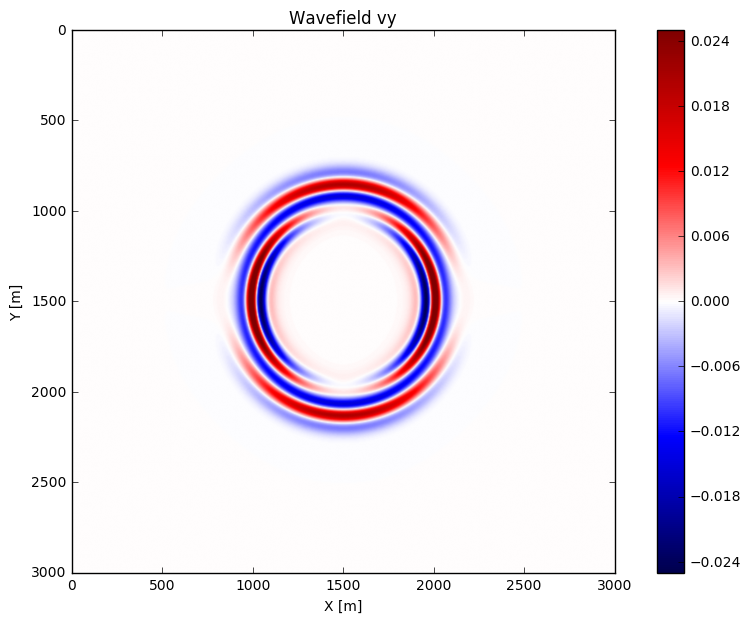

In [7]:
# plot resulting wavefield
fig = pyplot.figure(figsize=(11,7))
extent = [numpy.min(X),numpy.max(X),numpy.min(X),numpy.max(Y)]
# plotting vy field
im2 = pyplot.imshow(vy, cmap=cm.seismic, interpolation='bicubic', extent = extent, vmin=-clip, vmax=clip)  
pyplot.colorbar()
pyplot.title('Wavefield vy')
pyplot.xlabel('X [m]')
pyplot.ylabel('Y [m]')
pyplot.gca().invert_yaxis()

The vy wavefield snapshot shows the direct P- and S-wave propagating in the homogeneous block model. Note the amplitude distribution along the circumference of the wavefront. Due to the impact source, maximum amplitudes of the P-wave occur along the direction of the impact and perpendicular to the impact for the S-wave. Amplitude minima are located at a 90° offset.  

---
__Text provided under a Creative Commons Attribution license, CC-BY.  All code is made available under the GNU GPL 3.0 license.  (c) Daniel Köhn, Denise De Nil 2017. This notebook is inspired by the [CFDPython](https://github.com/barbagroup/CFDPython) course (c) Lorena A. Barba, Gilbert F. Forsyth 2015__